<a href="https://colab.research.google.com/github/zgrigoryan/Bifurcation_Diagram/blob/main/bifurcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are given the following set of equations:

$$
\dot{x} = \sum_{k=1}^4 \frac{(x-a_k)[1-(x-a_k)^2-(y-b_k)^2]-(y-b_k)}{1+(x-a_k)^6+(y-b_k)^6}
$$
$$
\dot{y} = \sum_{k=1}^4 \frac{(y-b_k)[1-(x-a_k)^2-(y-b_k)^2]+(x-a_k)}{1+(x-a_k)^6+(y-b_k)^6}
$$

In [1]:
import numpy as np

In [2]:
def x_dot(x: float, y: float, a: np.ndarray, b: np.ndarray) -> float:

    dx = x - a          # shape (4,)
    dy = y - b          # shape (4,)

    r2  = dx**2 + dy**2
    den = 1 + dx**6 + dy**6

    return np.sum((dx * (1 - r2) - dy) / den)


def y_dot(x: float, y: float, a: np.ndarray, b: np.ndarray) -> float:

    dx = x - a
    dy = y - b

    r2  = dx**2 + dy**2
    den = 1 + dx**6 + dy**6

    return np.sum((dy * (1 - r2) + dx) / den)

**Step 1**
Implementation of explicit RK4 that solves the equations for given coefficients

In [4]:
def rhs(t, z, a, b):
    """Right-hand side: z = [x, y]. Returns [x_dot, y_dot]."""
    x, y = z

    dx = x - a
    dy = y - b

    r2  = dx**2 + dy**2
    den = 1 + dx**6 + dy**6

    x_dot = np.sum((dx * (1 - r2) - dy) / den)
    y_dot = np.sum((dy * (1 - r2) + dx) / den)

    return np.array([x_dot, y_dot], dtype=float)


def rk4_step(t, z, dt, a, b):
    """One explicit RK4 step for z' = rhs(t, z, a, b)."""
    k1 = rhs(t,         z,             a, b)
    k2 = rhs(t + dt/2., z + dt*k1/2.,  a, b)
    k3 = rhs(t + dt/2., z + dt*k2/2.,  a, b)
    k4 = rhs(t + dt,    z + dt*k3,     a, b)

    return z + dt * (k1 + 2*k2 + 2*k3 + k4) / 6.0


def solve_rk4(t0, t1, dt, z0, a, b):
    """
    Integrate from t0 to t1 with step dt using RK4.
    z0 = [x0, y0].
    Returns (t_vals, z_vals) where z_vals[:,0]=x, z_vals[:,1]=y.
    """
    n_steps = int(np.ceil((t1 - t0) / dt))
    t_vals = np.linspace(t0, t1, n_steps + 1)
    z_vals = np.zeros((n_steps + 1, 2), dtype=float)

    z = np.array(z0, dtype=float)
    z_vals[0] = z

    t = t0
    for i in range(n_steps):
        z = rk4_step(t, z, dt, a, b)
        t = t_vals[i+1]
        z_vals[i+1] = z

    return t_vals, z_vals

**Step 2**
Generatinjg 20 different initial values for $x, y$ such that the points are on the edges of the square $(0, 0)|(8, 8)$

We can uniformly choose 5 points from each edge of the square.

In [10]:
def boundary_initial_conditions(L=8.0, n_per_side=5):

    vals = np.linspace(0.0, L, n_per_side)

    bottom = np.column_stack((vals, np.zeros_like(vals)))       # y=0
    right  = np.column_stack((np.full_like(vals, L), vals))     # x=L
    top    = np.column_stack((vals, np.full_like(vals, L)))     # y=L
    left   = np.column_stack((np.zeros_like(vals), vals))       # x=0

    points = np.vstack((bottom, right, top, left))
    # remove duplicates (corners):
    points = np.unique(points, axis=0)

    return points

Another function for plotting complete trajectories:

In [11]:
import matplotlib.pyplot as plt

In [14]:
def plot_trajectories(a, b, dt=0.1, T=50.0, n_per_side=5, L=8.0, title=None):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)

    inits = boundary_initial_conditions(L=L, n_per_side=n_per_side)

    plt.figure(figsize=(6, 6))

    # plot trajectories
    for (x0, y0) in inits:
        t_vals, traj = solve_rk4(
            t0=0.0,
            t1=T,
            dt=dt,
            z0=[x0, y0],
            a=a,
            b=b
        )
        plt.plot(traj[:, 0], traj[:, 1], linewidth=0.8)

    # mark initial points
    plt.scatter(inits[:, 0], inits[:, 1], s=20, marker='o', label='initial points')

    # mark centers (a_k, b_k)
    plt.scatter(a, b, s=40, marker='x', label='centers (a_k, b_k)')

    plt.xlim(-1, L + 1)
    plt.ylim(-1, L + 1)
    plt.gca().set_aspect('equal', 'box')
    plt.xlabel('x')
    plt.ylabel('y')
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Take $dt = 0.1, a = [2, 2, 6, 6], b = [2, 6, 2, 6]$ and plot the complete trajectories for all initial values. Take $dt = 0.1, a = [2, 2, 4, 4], b = [2, 4, 2, 4]$ and plot the complete trajectories for all initial values

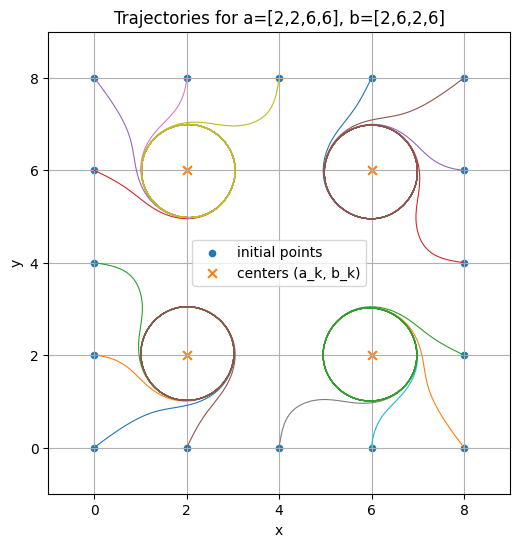

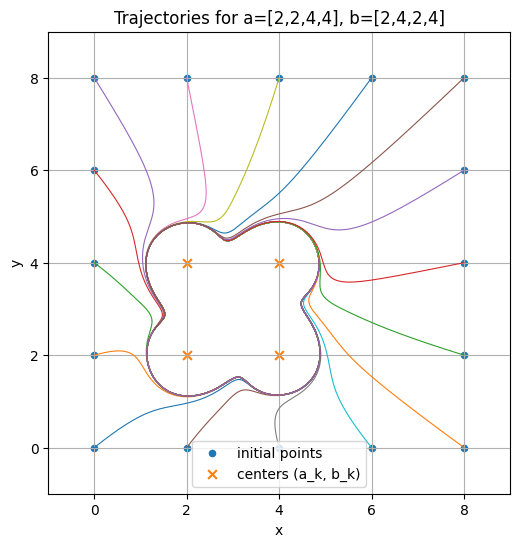

In [17]:
dt = 0.1

# Step 3
a1 = [2, 2, 6, 6]
b1 = [2, 6, 2, 6]
plot_trajectories(a1, b1, dt=dt, T=50.0,
                  title='Trajectories for a=[2,2,6,6], b=[2,6,2,6]')

# Step 4
a2 = [2, 2, 4, 4]
b2 = [2, 4, 2, 4]
plot_trajectories(a2, b2, dt=dt, T=50.0,
                  title='Trajectories for a=[2,2,4,4], b=[2,4,2,4]')


When $a = [2,2,6,6]$ and $b = [2,6,2,6]$ the four centers are well separated.
Around each point $(a_k,b_k)$ the flow forms an almost circular stable limit cycle, so trajectories starting from the boundary of the square are attracted to one of four distinct periodic orbits. In other words, the phase plane is divided into four basins of attraction, one for each local oscillator.

When we change the parameters to $a = [2,2,4,4]$ and $b = [2,4,2,4]$, the centers move closer together. The individual circular limit cycles disappear and are replaced by a single, larger, clover-shaped stable limit cycle that surrounds all four points. Now every trajectory starting from the boundary is attracted to this one periodic orbit.

Thus, as the parameters $a$ and $b$ vary, the system undergoes a global bifurcation of limit cycles: four separate stable limit cycles coalesce into a single global stable limit cycle. The number of attractors drops from four to one, and the attracting set changes from four disjoint circles to one connected closed curve encircling all four centers.


**STEP 5**

In [29]:
def centers(t, T):
    s = 4 + 2 * np.exp(-t / T)      # 6 -> 4
    a = np.array([2.0, 2.0, s,  s])
    b = np.array([2.0, s,  2.0, s])
    return a, b


def rhs_time(t, z, T):
    x, y = z
    a, b = centers(t, T)

    dx = x - a
    dy = y - b

    r2  = dx**2 + dy**2
    den = 1 + dx**6 + dy**6

    x_dot = np.sum((dx * (1 - r2) - dy) / den)
    y_dot = np.sum((dy * (1 - r2) + dx) / den)

    return np.array([x_dot, y_dot], dtype=float)


def rk4_step_time(t, z, dt, T):
    k1 = rhs_time(t,             z,               T)
    k2 = rhs_time(t + 0.5*dt,    z + 0.5*dt*k1,   T)
    k3 = rhs_time(t + 0.5*dt,    z + 0.5*dt*k2,   T)
    k4 = rhs_time(t + dt,        z + dt*k3,       T)
    return z + dt * (k1 + 2*k2 + 2*k3 + k4) / 6.0


def solve_rk4_time(t0, t1, dt, z0, T):
    n_steps = int(np.ceil((t1 - t0) / dt))
    t_vals = np.linspace(t0, t1, n_steps + 1)
    z_vals = np.zeros((n_steps + 1, 2))

    z = np.array(z0, dtype=float)
    z_vals[0] = z
    t = t0

    for i in range(n_steps):
        z = rk4_step_time(t, z, dt, T)
        t = t_vals[i+1]
        z_vals[i+1] = z

    return t_vals, z_vals

In [32]:
def plot_transition_full(T, dt=0.1, L=8.0, n_per_side=5, t_final=None):
    """
    Time–dependent case: a(t), b(t).
    Plot complete trajectories for all initial values.
    """
    if t_final is None:
        t_final = 4 * T   # long enough to be close to case 4

    inits = boundary_initial_conditions(L=L, n_per_side=n_per_side)

    fig, ax = plt.subplots(figsize=(6, 6))

    # full trajectories
    for (x0, y0) in inits:
        t_vals, traj = solve_rk4_time(0.0, t_final, dt, [x0, y0], T)
        ax.plot(traj[:, 0], traj[:, 1], linewidth=0.8)

    # initial and final centers
    a0, b0 = centers(t=0.0, T=T)
    aF, bF = centers(t=t_final, T=T)

    ax.scatter(inits[:, 0], inits[:, 1], s=20, marker='o', label='initial points')
    ax.scatter(a0, b0, s=40, marker='x', label='centers at t=0')
    ax.scatter(aF, bF, s=40, marker='+', label=f'centers at t={t_final:g}')

    ax.set_xlim(-1, L + 1)
    ax.set_ylim(-1, L + 1)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_title(r"Transition from case 3 to case 4 (full trajectories)")
    ax.legend()
    plt.tight_layout()
    plt.show()

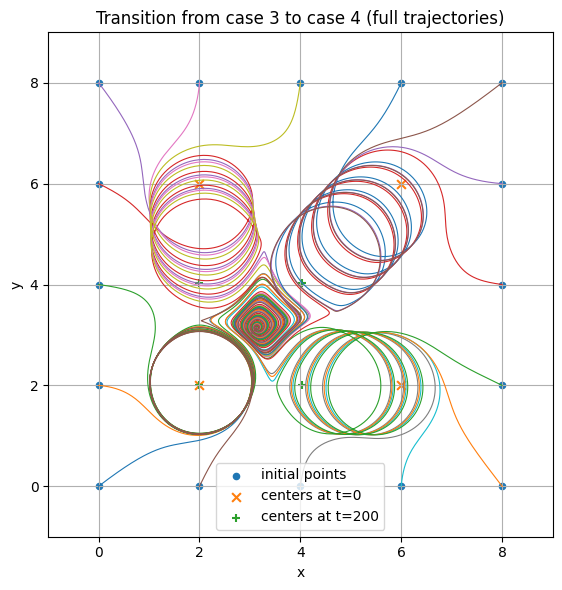

In [34]:
T_param = 50.0
plot_transition_full(T_param, dt=0.1)